In [286]:
import pandas as pd
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [287]:
dataset = pd.read_csv('data_processed.csv')

In [288]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
dataset.head()

BITS ID  Campus Program Applied       Target Discipline  \
0   2015a7ts0081p  pilani              ms        computer science   
1  2012c6psc6598p  pilani              ms        computer science   
2    2014a3ps224p  pilani              ms  mechanical engineering   
3   2015a3ps0270p  pilani              ms        computer science   
4    2012b1a4761p  pilani             phd          bioengineering   

                              Sub-Discipline  CGPA University Selected  \
0  artificial intelligence/ machine learning  7.93        arizonastate   
1                                        NaN  6.70        arizonastate   
2                                   robotics  7.78        arizonastate   
3                                        NaN  7.98        arizonastate   
4                        tissue engineering   8.40              boston   

   GRE Score : Verbal  GRE Score : Quant  GRE Score : AWA  TOEFL Score  \
0               154.0              170.0              4.0        105.0   
1               159.0              167.0              3.5        110.0   
2               154.0              169.0              3.5        110.0   
3               148.0              169.0              4.0        103.0   
4               163.0              164.0              5.0        118.0   

                                Universities Applied  \
0  arizona state university, carnegie melon unive...   
1  arizona state university, suny buffalo, suny s...   
2  arizona state university, georgia tech, johns ...   
3  arizona state university, san jose state unive...   
4  boston university, georgia tech, harvard unive...   

                                  Universities Admit  \
0                           arizona state university   
1             arizona state university, suny buffalo   
2                                 u maryland, u mich   
3  arizona state university, suny buffalo, u flor...   
4  boston university, u caifornia irvine, tufts u...   

  Universities (Funded admit) Work experience  Duration of work experience  \
0                          no             yes                          1.5   
1                          no             yes                          1.5   
2                          no              no                          0.0   
3                          no              no                          0.5   
4                         yes             yes                          1.5   

  Relevance of PS2/Thesis to program Internship other than PS1/PS2  \
0                                 no                           yes   
1                                yes                            no   
2                                 no                            no   
3                                yes                            no   
4                                yes                           yes   

  Consultancy/Classes Conference publication   rank Other Internship Success?  
0                  no                    yes  209.0              yes      yes  
1                  no                     no  209.0               no      yes  
2                  no                     no  209.0               no      yes  
3                  no                     no  209.0               no      yes  
4                  no                    yes   81.0              yes      yes

In [289]:
dataset.columns = dataset.columns.str.lower()

In [290]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1426 entries, 0 to 1425
Data columns (total 23 columns):
bits id                               1426 non-null object
campus                                1426 non-null object
program applied                       1426 non-null object
target discipline                     1426 non-null object
sub-discipline                        1002 non-null object
cgpa                                  1426 non-null float64
university selected                   1282 non-null object
gre score : verbal                    1426 non-null float64
gre score : quant                     1426 non-null float64
gre score : awa                       1426 non-null float64
toefl score                           1426 non-null float64
universities applied                  1425 non-null object
universities admit                    1407 non-null object
universities (funded admit)           1426 non-null object
work experience                       1426 non-null object
dur

In [291]:
dataset.describe()

cgpa  gre score : verbal  gre score : quant  gre score : awa  \
count  1426.000000         1426.000000        1426.000000      1426.000000   
mean      8.250832          158.277069         164.004841         3.835397   
std       0.967773            6.437884           6.396394         0.632985   
min       0.000000          138.000000         136.000000         2.000000   
25%       7.592500          154.000000         163.000000         3.500000   
50%       8.310000          159.000000         166.000000         4.000000   
75%       9.000000          163.000000         168.000000         4.000000   
max      10.000000          170.000000         170.000000         6.000000   

       toefl score  duration of work experience         rank  
count  1426.000000                  1426.000000  1282.000000  
mean    109.794158                     1.063612   115.024181  
std       5.722412                     1.865100   141.435537  
min      85.000000                     0.000000     0.000000  
25%     107.000000                     0.000000     3.000000  
50%     110.538160                     0.500000    67.000000  
75%     114.000000                     2.000000   178.000000  
max     120.000000                    34.000000   854.000000

Observations 
- The mean rank value is espcially wrong due to imputing values to zero for not successful applications
- Maximum of work duration seems like an outlier

In [292]:
#looking for outliers in duration of work experience
l =dataset[dataset['duration of work experience'] > 10].index
dataset.loc[l,'duration of work experience'] = dataset['duration of work experience'].mean()    #imputing with average

In [293]:
numeric_features = []
for column in dataset.columns:
     if(dataset[column].dtypes == 'float64'):
            numeric_features.append(column)

In [294]:
numeric_features

['cgpa',
 'gre score : verbal',
 'gre score : quant',
 'gre score : awa',
 'toefl score',
 'duration of work experience',
 'rank']

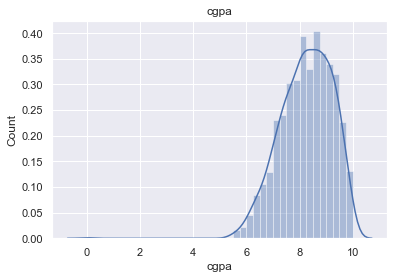

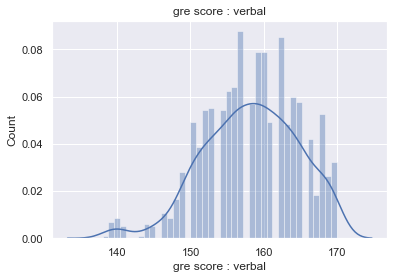

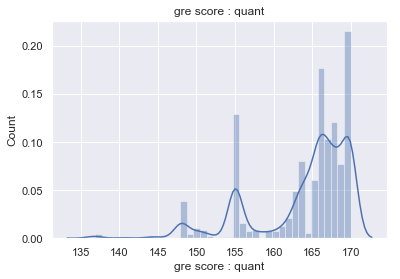

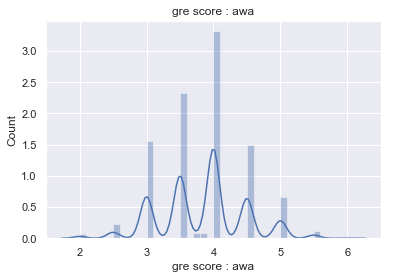

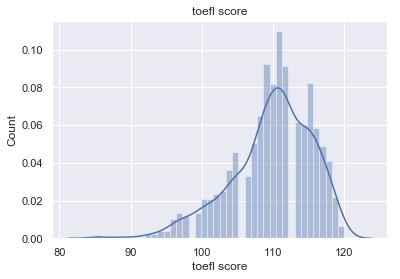

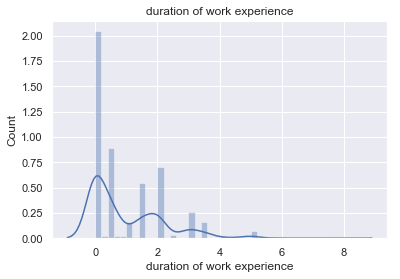

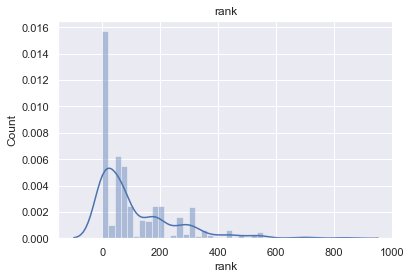

In [354]:
for feature in numeric_features:
    data=dataset.copy()
    sns.distplot(data[feature],bins=40)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()



Rank 0 correspond to unsucessful applications, Awa score values are discrete

In [296]:
dataset.columns

Index(['bits id', 'campus', 'program applied', 'target discipline',
       'sub-discipline', 'cgpa', 'university selected', 'gre score : verbal',
       'gre score : quant', 'gre score : awa', 'toefl score',
       'universities applied', 'universities admit',
       'universities (funded admit)', 'work experience',
       'duration of work experience', 'relevance of ps2/thesis to program',
       'internship other than ps1/ps2', 'consultancy/classes',
       'conference publication', 'rank', 'other internship', 'success?'],
      dtype='object')

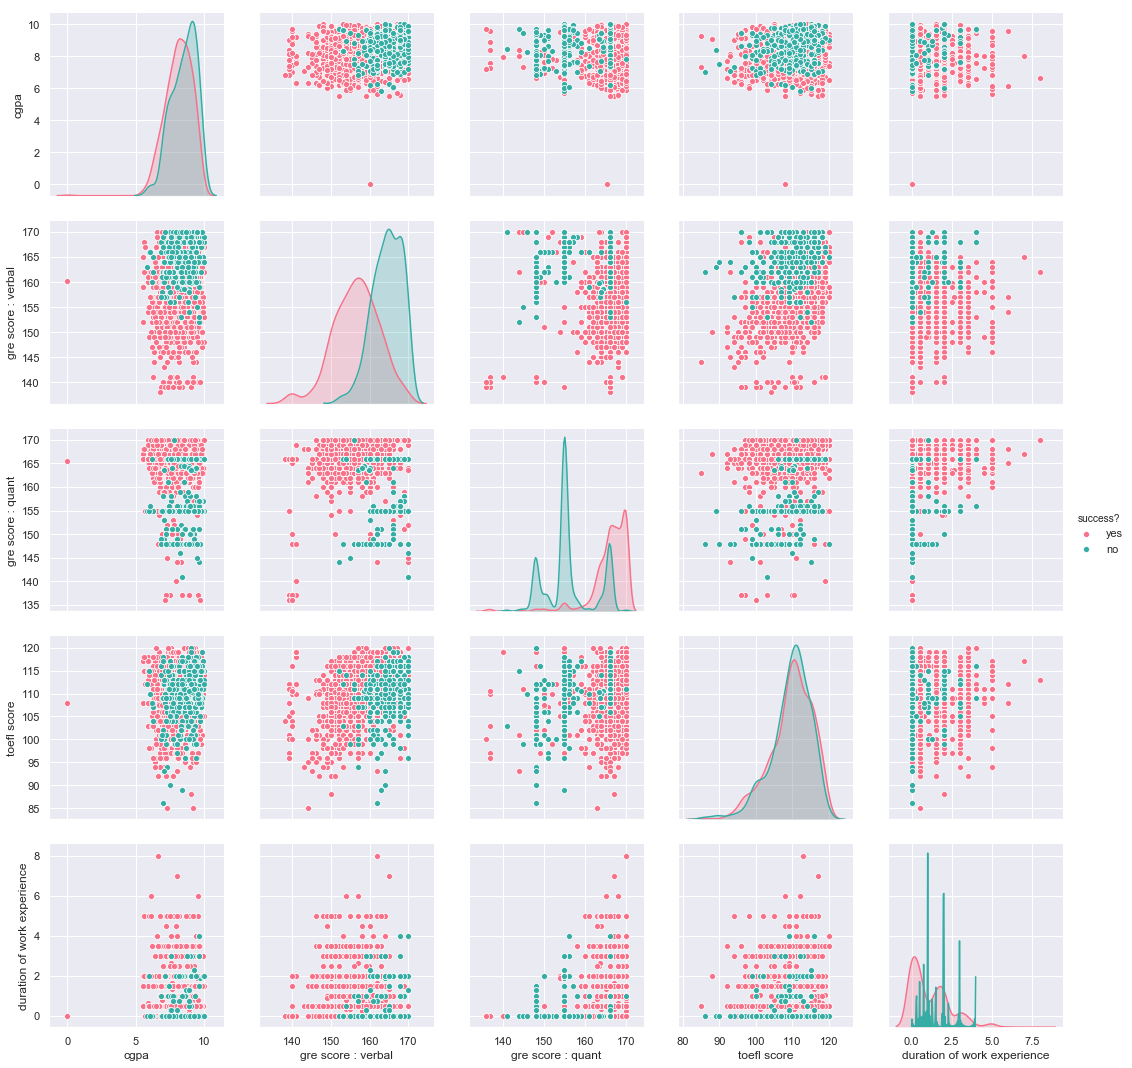

In [324]:
sns.pairplot(dataset, vars=['cgpa',
 'gre score : verbal',
 'gre score : quant',
 'toefl score',
 'duration of work experience'], hue= 'success?', height=3, palette = 'husl')

Categorical features

In [297]:
categorical_features = []
for column in dataset.columns:
     if((dataset[column].dtypes == 'object') & (column != 'bits id') ):                                #excluding bits id
            categorical_features.append(column)

In [298]:
categorical_features

['campus',
 'program applied',
 'target discipline',
 'sub-discipline',
 'university selected',
 'universities applied',
 'universities admit',
 'universities (funded admit)',
 'work experience',
 'relevance of ps2/thesis to program',
 'internship other than ps1/ps2',
 'consultancy/classes',
 'conference publication',
 'other internship',
 'success?']

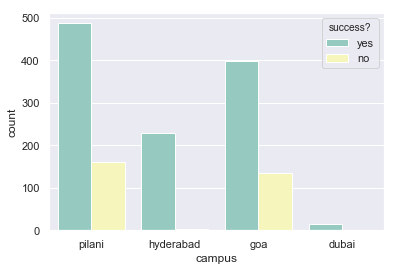

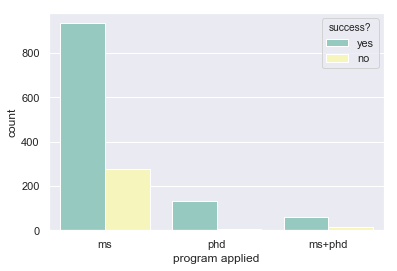

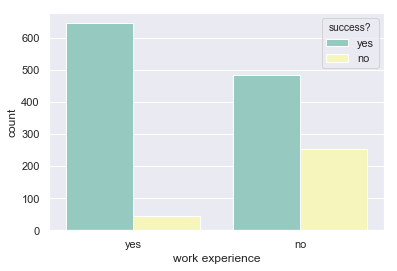

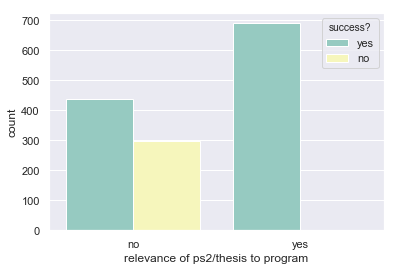

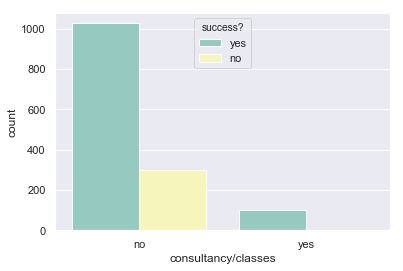

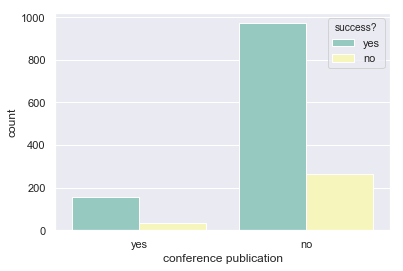

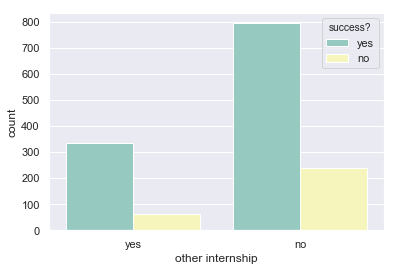

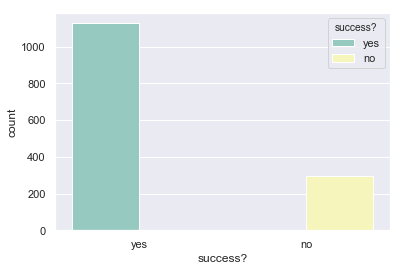

In [299]:
#Plotting features with small number of categories
for feature in categorical_features:
    if (dataset[feature].nunique()< 10):
        sns.countplot(x = feature , data = dataset, hue= dataset['success?'], palette="Set3")
        plt.show()

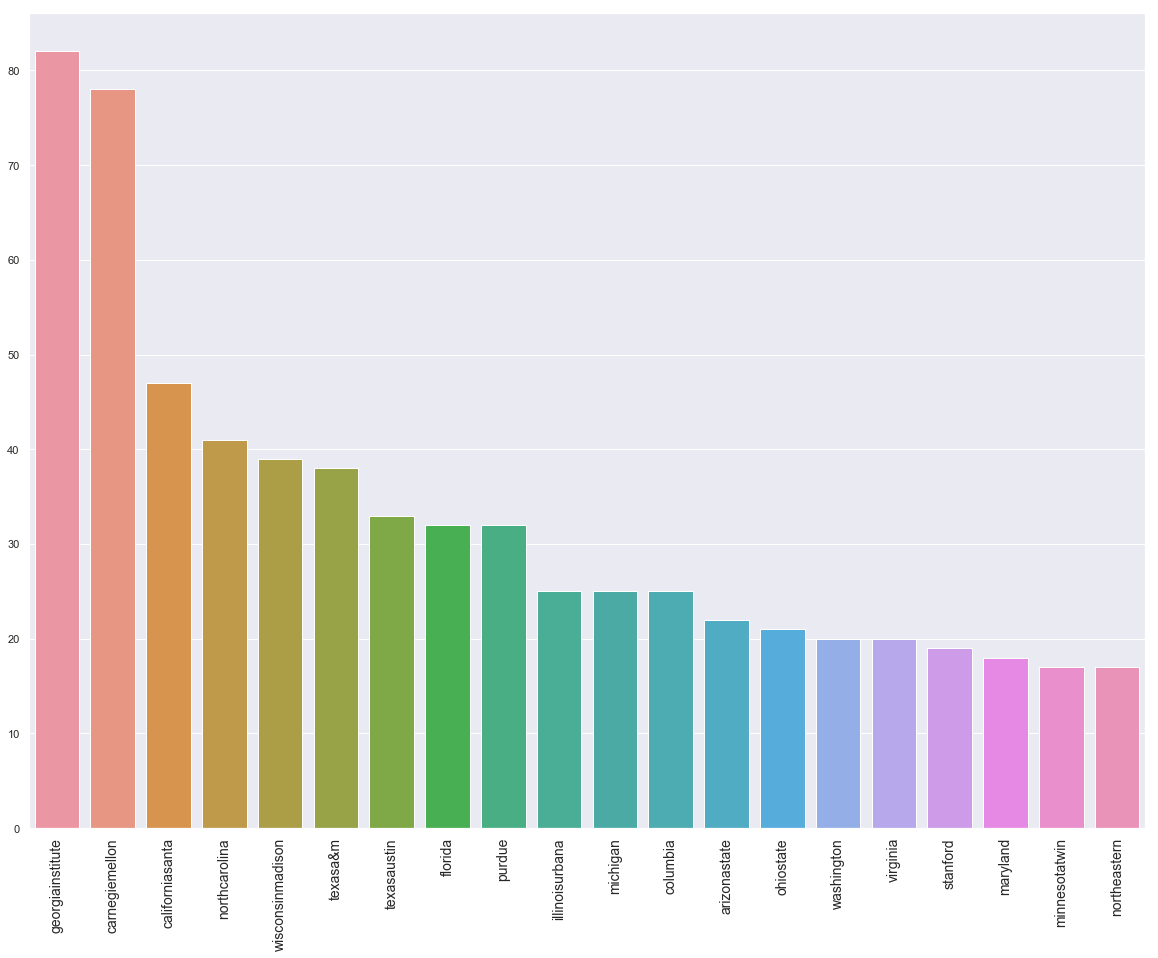

In [300]:
sns.set()
plt.figure(figsize=(20,15))
plt.xticks(fontsize=14, rotation=90)
ser = dataset['university selected'].value_counts()[1:21]                   #Plotting 20 most selected univerisities
sns.barplot(ser.index, ser.values)


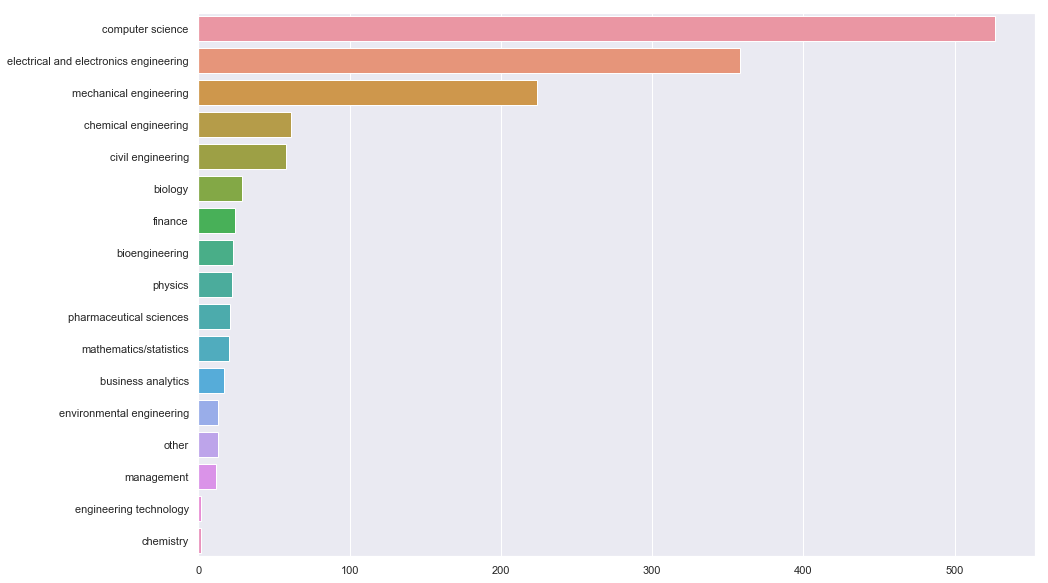

In [301]:
dataset['target discipline'].nunique()
plt.figure(figsize=(15,10))
ser = dataset['target discipline'].value_counts()
sns.barplot(ser.values, ser.index, orient = 'h')

In [302]:
categorical_small

['bits id',
 'campus',
 'program applied',
 'target discipline',
 'sub-discipline',
 'university selected',
 'universities applied',
 'universities admit',
 'universities (funded admit)',
 'work experience',
 'relevance of ps2/thesis to program',
 'internship other than ps1/ps2',
 'consultancy/classes',
 'conference publication',
 'other internship',
 'success?']

As there are a lot of universities selected for classification, making groups based on range of ranks 

Binning university selected variable based on ranks 

In [309]:
bin_labels_5 = ['excellent', 'very_good', 'good', 'average', 'below average']
dataset['rank_segmented'] = pd.qcut(dataset[dataset['rank']!=0]['rank'],
                              q=[0, .2, .4, .6, .8, 1],
                              labels=bin_labels_5 )

In [310]:
categories = ['excellent', 'very_good', 'good', 'average', 'below average', 'notselected']
dataset['rank_segmented']= pd.Categorical(dataset['rank_segmented'], categories=categories, ordered=True)
l = dataset[dataset['rank']==0].index
dataset.loc[l,'rank_segmented'] = 'notselected'

In [311]:
dataset['rank_segmented'].value_counts()

notselected      298
excellent        240
very_good        231
average          224
below average    170
good             119
Name: rank_segmented, dtype: int64

In [312]:
lis = []
for rank in dataset['rank_segmented'].unique():
    lis.append([rank , dataset[dataset['rank_segmented'] == rank]['university selected'].unique()])
df_uni = pd.DataFrame(lis)
df_uni.columns = ['rank','universities']
df_uni.set_index('rank', inplace= True)


In [313]:
lis

[['average',
  array(['arizonastate', 'michiganstate', 'northcarolina', 'texasa&m',
         'twente', 'coloradoboulder', 'florida', 'californiairvine',
         'minnesotatwin', 'illinoischicago', 'massachusettsamherst',
         'notredame', 'virginia', 'waterloo', 'ntnunorway', 'stockholm',
         'casewestern', 'rochester', 'western', 'collegedublin', 'hamburg',
         'curtin', 'freiburg', 'barcelona'], dtype=object)],
 ['good',
  array(['boston', 'leuven', 'ohiostate', 'pennsylvaniastate', 'purdue',
         'rwthaachen', 'californiadavis', 'maryland', 'alberta',
         'southerncalifornia', 'zurich', 'rice', 'technicalberlin',
         'chalmers', 'essec', 'queenmary'], dtype=object)],
 ['excellent',
  array(['carnegiemellon', 'columbia', 'cornell', 'duke', 'harvard',
         'imperialcollege', 'johnshopkins', 'nationalsingapore', 'oxford',
         'stanford', 'californialos', 'californiaberkeley', 'chicago',
         'michigan', 'pennsylvania', 'toronto', 'unsw', 'edinb

In [326]:
dataset.columns

Index(['bits id', 'campus', 'program applied', 'target discipline',
       'sub-discipline', 'cgpa', 'university selected', 'gre score : verbal',
       'gre score : quant', 'gre score : awa', 'toefl score',
       'universities applied', 'universities admit',
       'universities (funded admit)', 'work experience',
       'duration of work experience', 'relevance of ps2/thesis to program',
       'internship other than ps1/ps2', 'consultancy/classes',
       'conference publication', 'rank', 'other internship', 'success?',
       'rank_segmented'],
      dtype='object')

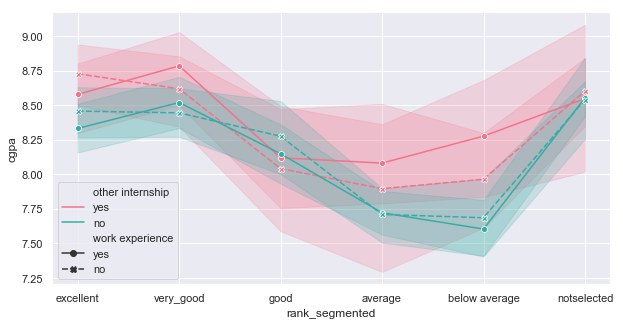

In [365]:
plt.figure(figsize=(10,5))
sns.lineplot(x=dataset['rank_segmented'], y = dataset['cgpa'], style = dataset['work experience'], hue = dataset['other internship'], palette = 'husl',markers =True )


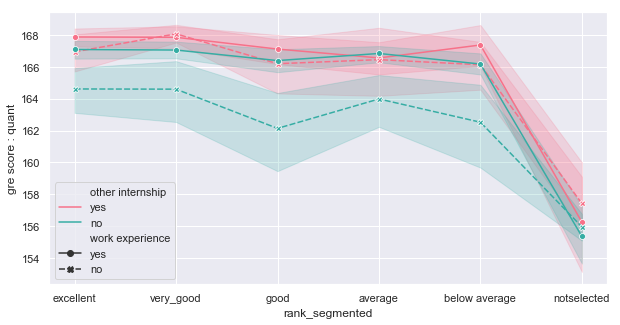

In [346]:
plt.figure(figsize=(10,5))
sns.lineplot(x=dataset['rank_segmented'], y = dataset['gre score : quant'], style = dataset['work experience'], hue = dataset['other internship'], palette = 'husl' ,markers =True )

In [334]:
dataset[dataset['university selected'] == 'not selected']

bits id     campus program applied  \
632   2010a3ts188h  hyderabad              ms   
633   2009a7ps155h  hyderabad              ms   
1130   2005 pilani     pilani              ms   
1131      2006 goa        goa              ms   
1132   2006 pilani     pilani              ms   
1133      2006 goa        goa              ms   
1134   2006 pilani     pilani              ms   
1135      2006 goa        goa              ms   
1136      2006 goa        goa              ms   
1137   2004 pilani     pilani              ms   
1138      2006 goa        goa              ms   
1139      2005 goa        goa              ms   
1140   2006 pilani     pilani              ms   
1141      2006 goa        goa              ms   
1142   2004 pilani     pilani              ms   
1143      2006 goa        goa              ms   
1144      2004 goa        goa              ms   
1145   2005 pilani        goa              ms   
1146      2006 goa        goa              ms   
1147   2006 pilani     pilani              ms   
1148      2005 goa        goa              ms   
1149      2005 goa        goa              ms   
1150   2004 pilani     pilani              ms   
1151   2005 pilani     pilani              ms   
1152      2005 goa        goa              ms   
1153      2006 goa        goa              ms   
1154   2006 pilani     pilani              ms   
1155      2005 goa        goa              ms   
1156   2006 pilani     pilani              ms   
1157      2006 goa        goa              ms   
1158      2006 goa        goa              ms   
1159   2006 pilani     pilani              ms   
1160      2004 goa        goa              ms   
1161      2006 goa        goa              ms   
1162   2006 pilani     pilani              ms   
1163   2003 pilani     pilani              ms   
1164   2006 pilani     pilani              ms   
1165      2006 goa        goa              ms   
1166      2005 goa        goa              ms   
1167      2005 goa        goa              ms   
1168      2005 goa        goa              ms   
1169      2005 goa        goa              ms   
1170      2005 goa        goa              ms   
1171   2006 pilani     pilani              ms   
1172   2006 pilani     pilani              ms   
1173   2004 pilani     pilani              ms   
1174   2006 pilani     pilani              ms   
1175   2005 pilani     pilani              ms   
1176   2005 pilani     pilani              ms   
1177      2006 goa        goa              ms   
1178      2006 goa        goa              ms   
1179   2005 pilani     pilani              ms   
1180   2007 pilani     pilani              ms   
1181      2005 goa        goa              ms   
1182      2005 goa        goa              ms   
1183   2004 pilani     pilani              ms   
1184      2006 goa        goa              ms   
1185   2004 pilani     pilani              ms   
1186      2005 goa        goa              ms   
1187      2005 goa        goa              ms   
1188      2006 goa        goa              ms   
1189      2005 goa        goa              ms   
1190      2005 goa        goa              ms   
1191   2005 pilani        goa              ms   
1192   2005 pilani        goa              ms   
1193      2005 goa        goa              ms   
1194   2004 pilani     pilani              ms   
1195      2006 goa        goa              ms   
1196      2006 goa        goa              ms   
1197   2005 pilani     pilani              ms   
1198      2006 goa        goa              ms   
1199      2006 goa        goa              ms   
1200      2005 goa        goa              ms   
1201   2003 pilani     pilani              ms   
1202      2006 goa        goa              ms   
1203   2004 pilani     pilani              ms   
1204   2005 pilani     pilani              ms   
1205      2006 goa        goa              ms   
1206   2001 pilani     pilani              ms   
1207   2004 pilani     pilani              ms   
1208   2006 pilani     pilani             